# importamos datos


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
import seaborn as sns
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
data.to_csv('/workspaces/machine-learning-joel/data/raw/AB_NYC_2019.csv',index=False)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Obtenemos las dimenciones y la informacion del dataset


In [37]:
data.shape

(48895, 16)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

en esta caso podemos observar que tenemos un par de columnas en las que hay considerable cantidad de valores nulos como lo son last_review y reviews_per_month

In [3]:
data.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

aqui revizamos que no existan columnas con valores unicos que no nos servirian para el proyecto como lo vemos no es el caso 

# Empezamos con la limpieza de datos 


Revizamos si existen duplicados 

In [4]:
data.duplicated().sum()

0

revisamos la proporcion de valores nulos que tenemos en cara columna 

In [10]:
data.isnull().mean()*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

en este caso podemos ver que las columnas "last_review"y"reviews_per_month" con nulas en el 20 porciento de las veces y que las variables name y host_name lo son en un porcentaje muy pequeño tenemso que decidir que hacer con las columnas "last_review" y "reviews_per_month" si direcvtamente no tenerlas en cuenta es decir eliminar las columnas o generar datos para estas para no tener que quitar tantos datos 

primero que nada nos vamos quitar las columnas "name","id","host_name" ya que estas considero que no son relevantes en nuestro analisis 

In [11]:
data.drop(['id','name','host_name'], axis=1, inplace=True)

Pasaremso a revizar que porcentaje total representan las variables nulas que nos quedan 

In [12]:
data.isnull().any(axis=1).sum()/len(data)*100

20.55833929849678

podenmos observar que representan el 20.5% si recordamos antes teniamos 2 columnas que tenian este mismo porcentaje cada una de valores nulos lo que quiere decir que seguramente exista un patron en el que cuando una es nula en la otra columna tambien lo sea de todas maneras revisaremos si este patron existe aunque ya lo podemos asumir 

<Axes: >

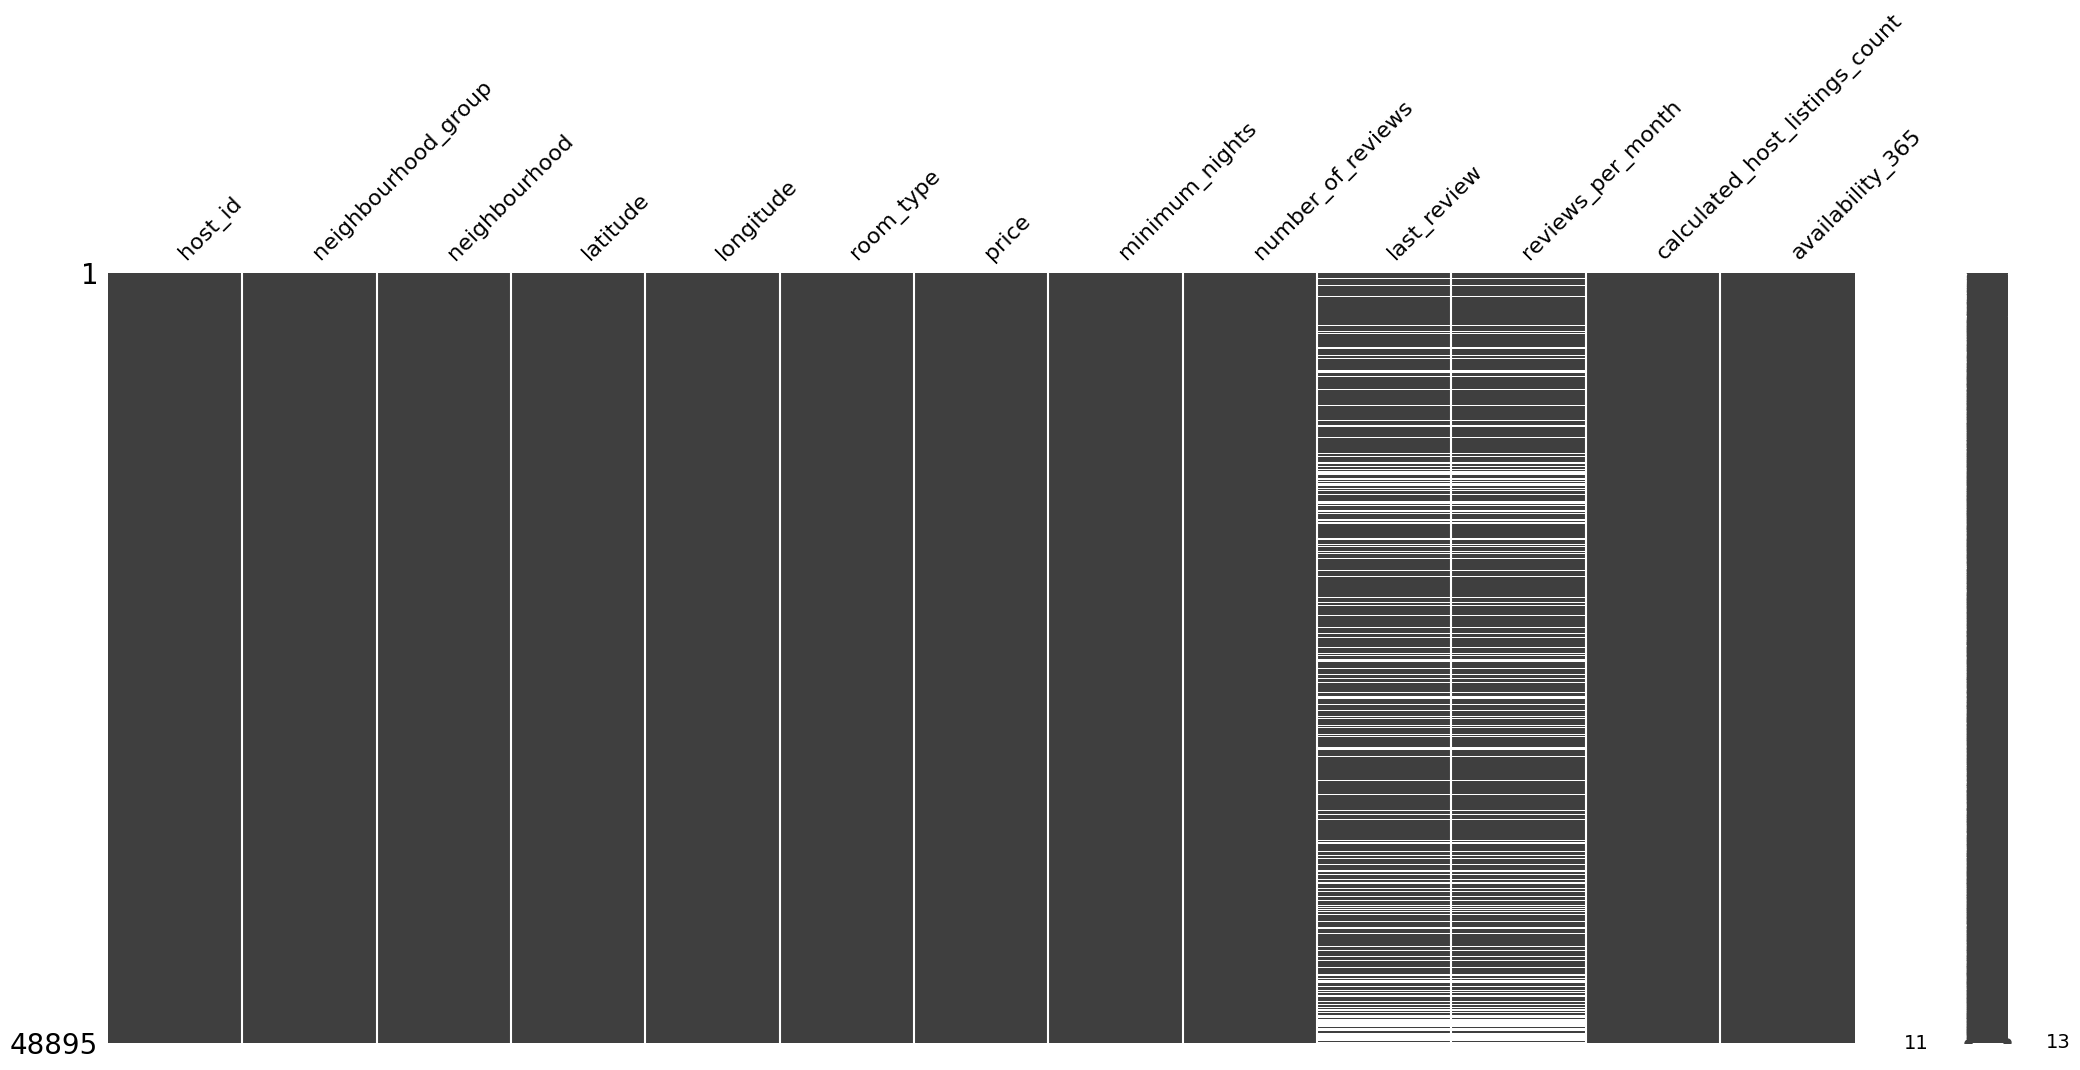

In [14]:
msno.matrix(data)

como podemos ver en la imagen existe un patron en el que si es nulo el valor en la columnaa de las_review en la columna de review_per_month tambien existe un valor nulo yo personalmente teniendo la columna de numbers_of_reviews que no tiene valores nulos me parecen irrelevantes los valores en estas 2 columnas para mi analisis asi que voy a proceder a eliminar las estas 2 ultimas 

In [15]:
data.drop(['last_review','reviews_per_month'], axis=1, inplace=True)

Revisamos nuevamente si existen valores nulos 

In [16]:
data.isnull().mean()*100

host_id                           0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

Ya no tenemos valores nulos  asi que procederemos con el analisis de Variables Categoricas 

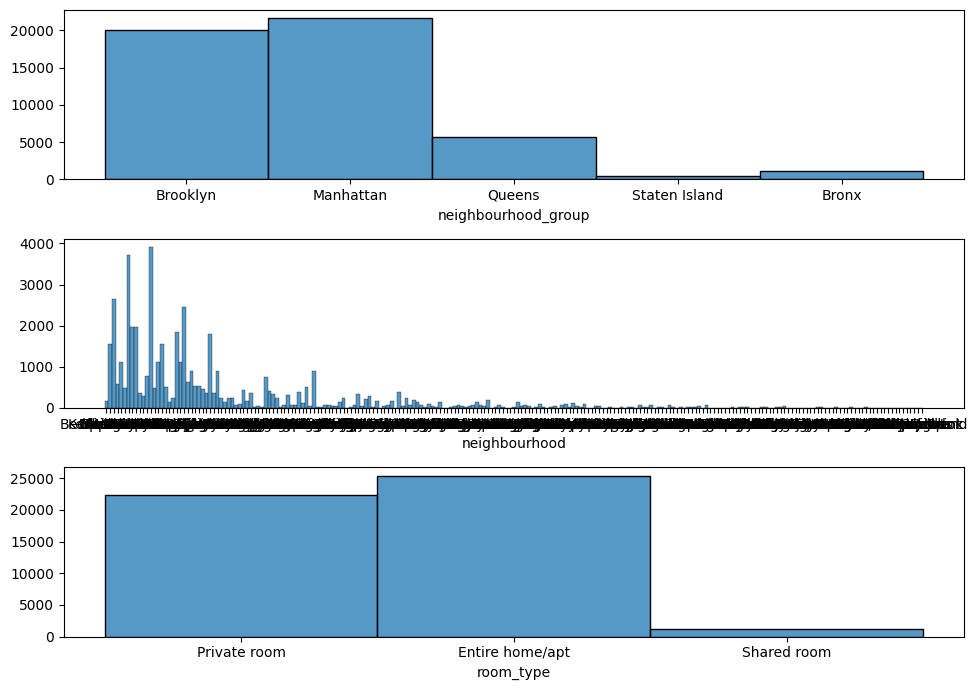

In [18]:
fig, axis = plt.subplots(3, figsize = (10, 7))

sns.histplot(ax = axis[0], data = data, x = 'neighbourhood_group').set(ylabel = None)
sns.histplot(ax = axis[1], data = data, x = 'neighbourhood').set(ylabel = None)
sns.histplot(ax = axis[2], data = data, x = 'room_type').set(ylabel = None)
plt.tight_layout()
plt.show()

neighbourhood_group: Podemos observar que en los barrios de Brooklyn y Manhattan se concentran la mayoria de arbnb esto debe ser producto a ser los barrios mas turisticos de la ciudad 

neighbourhood: en este caso tenemos muchas opciones hay que revisar si es relevante hacer el modelo utilizando unicamente la columna neighbourhood_group

room_type: podemos ver que no hay casi arbnb que sean cuartos compartidos seguramente sea la opcion menos demandada 

# Ahora pasamos a verificar la variable objetivo (precio):


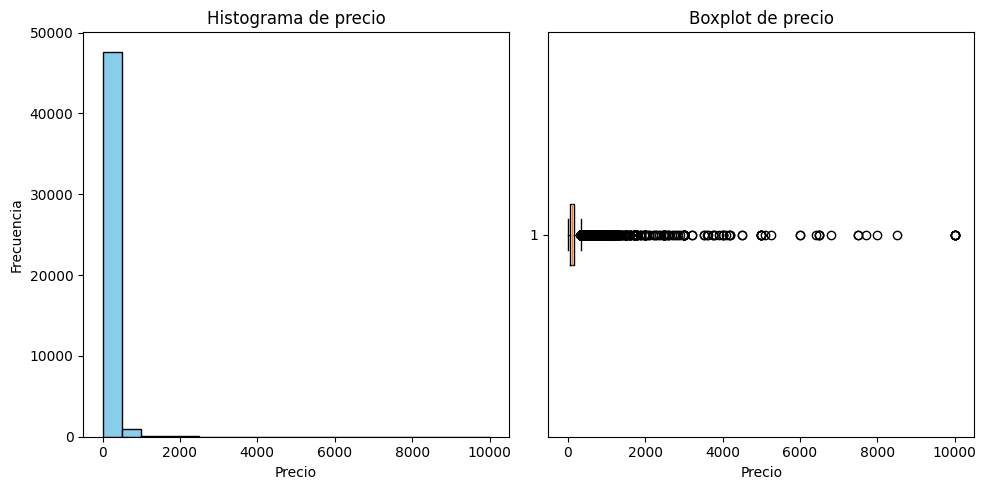

In [43]:

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(data['price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de precio')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(data['price'], vert=False)
ax[1].set_title('Boxplot de precio')
ax[1].set_xlabel('Precio')

plt.tight_layout()
plt.show()


podemos observar que en este caso no podamos hacer un modelo con esta variable y tengamos que aplicarle una funcion a la misma para que esta pueda ser manejable y lo haremos con la funcion logaritmica 

In [53]:
sum(data['price'] < 1 )

0

Podemos observar quye existen arbnbs con valores que son menores a 1 lo que me pareve muy extraño vamos a proceder a quitar estos valores 

In [54]:
data = data[data.price>1]

In [55]:
data['log_price'] = np.log(data.price)

data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,log_price
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,5.003946
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,5.416100
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,5.010635
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,4.488636
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,4.382027


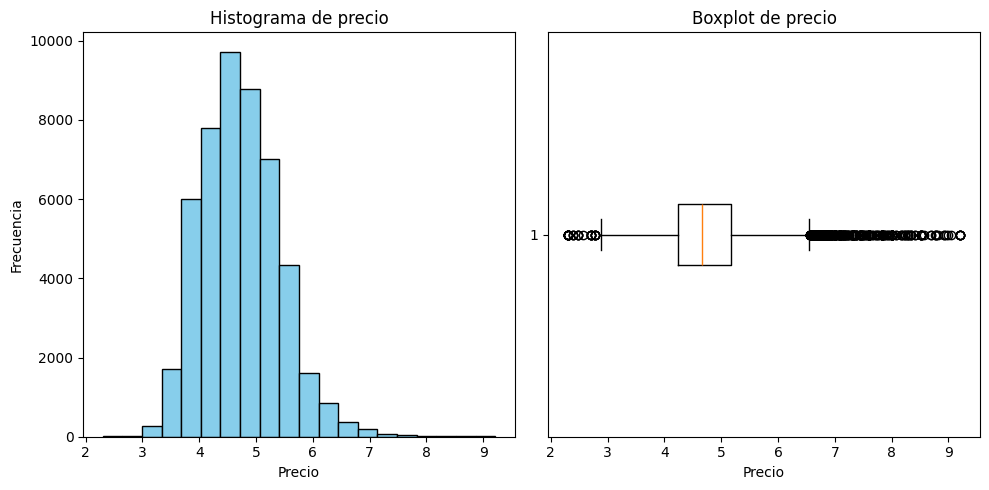

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(data['log_price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de precio')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(data['log_price'], vert=False)
ax[1].set_title('Boxplot de precio')
ax[1].set_xlabel('Precio')

plt.tight_layout()
plt.show()

podemos observar las graficas mas simetricas que es lo quue buscamos

In [77]:
X = pd.get_dummies(data.drop(['price', 'log_price','neighbourhood'], axis=1),drop_first=True)
X = X.astype(int)
y = data['log_price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
cooks_distance = model.get_influence().cooks_distance

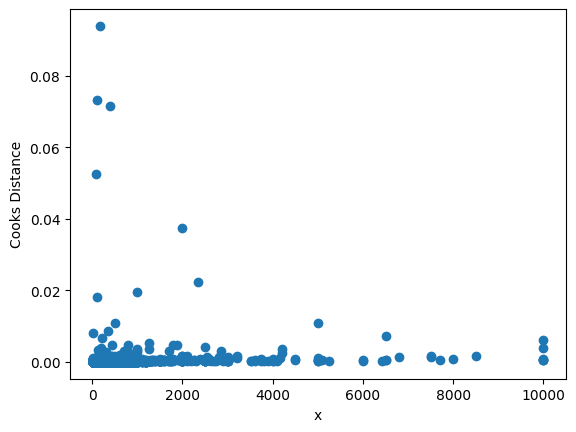

In [78]:
plt.scatter(data.price, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

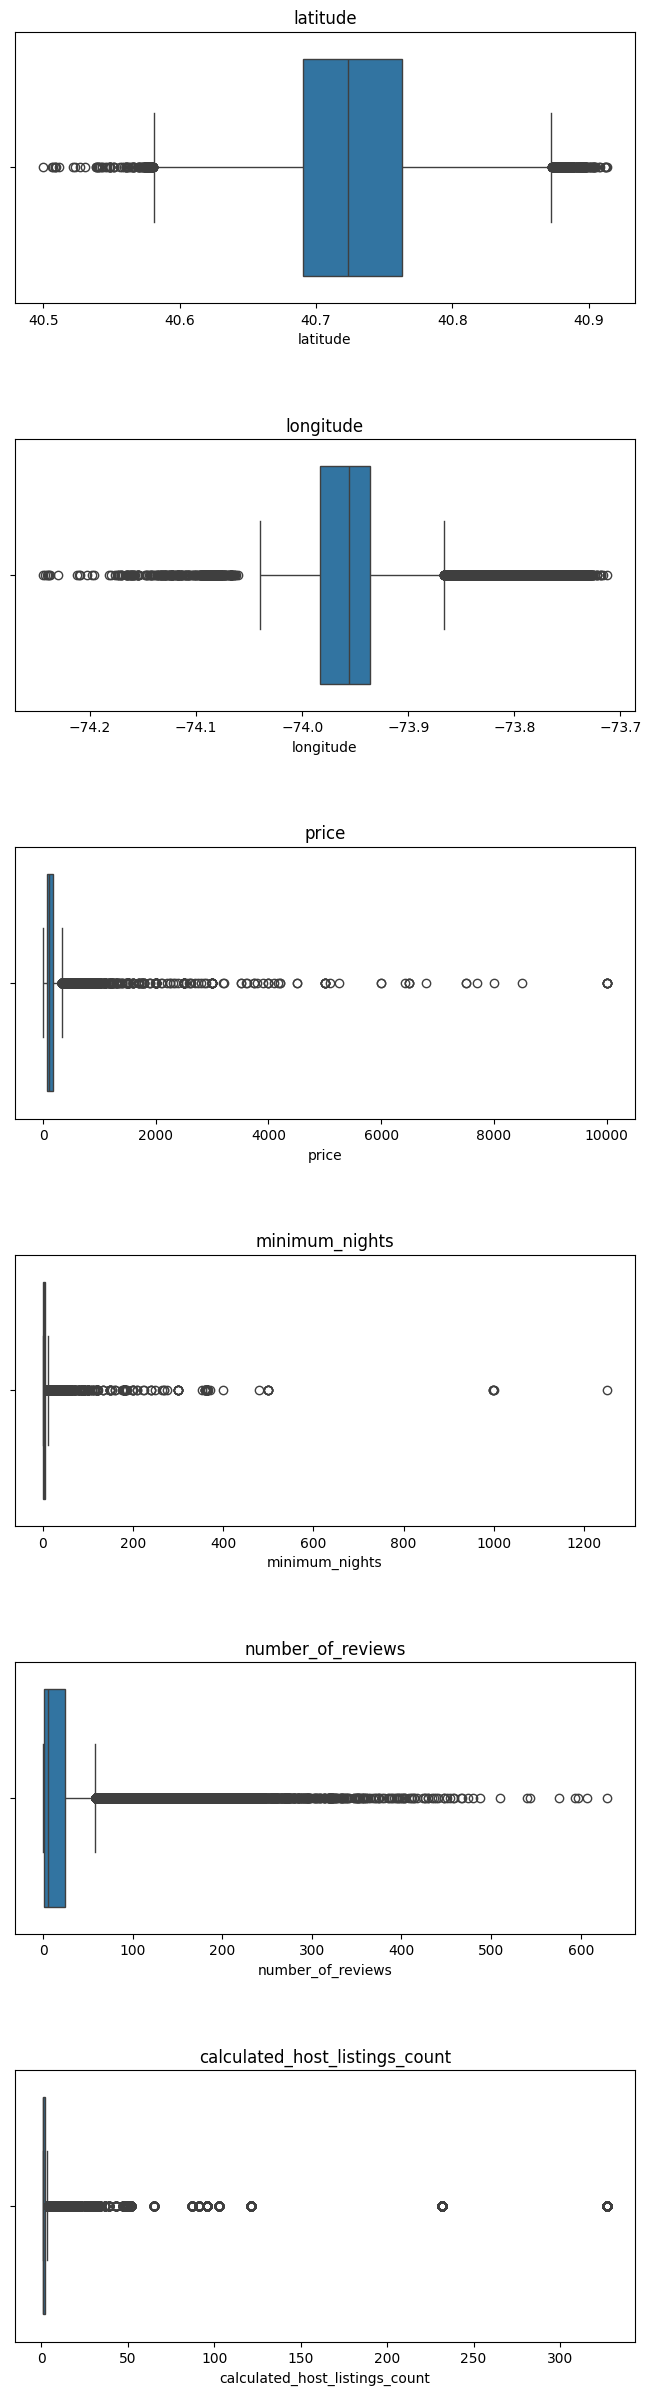

In [9]:
col_num = ["latitude","longitude","price","minimum_nights","number_of_reviews","calculated_host_listings_count"]
fig, ax = plt.subplots(nrows=len(col_num), ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(col_num):
    sns.boxplot(x=col,data=data,ax=ax[i])
    ax[i].set_title(col)

#   *preguntar si tiene sentido lo de las min de noches *

Revisamos si existen errores tipograficos 

/tmp/ipykernel_25887/1963148835.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
/tmp/ipykernel_25887/1963148835.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
/tmp/ipykernel_25887/1963148835.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)


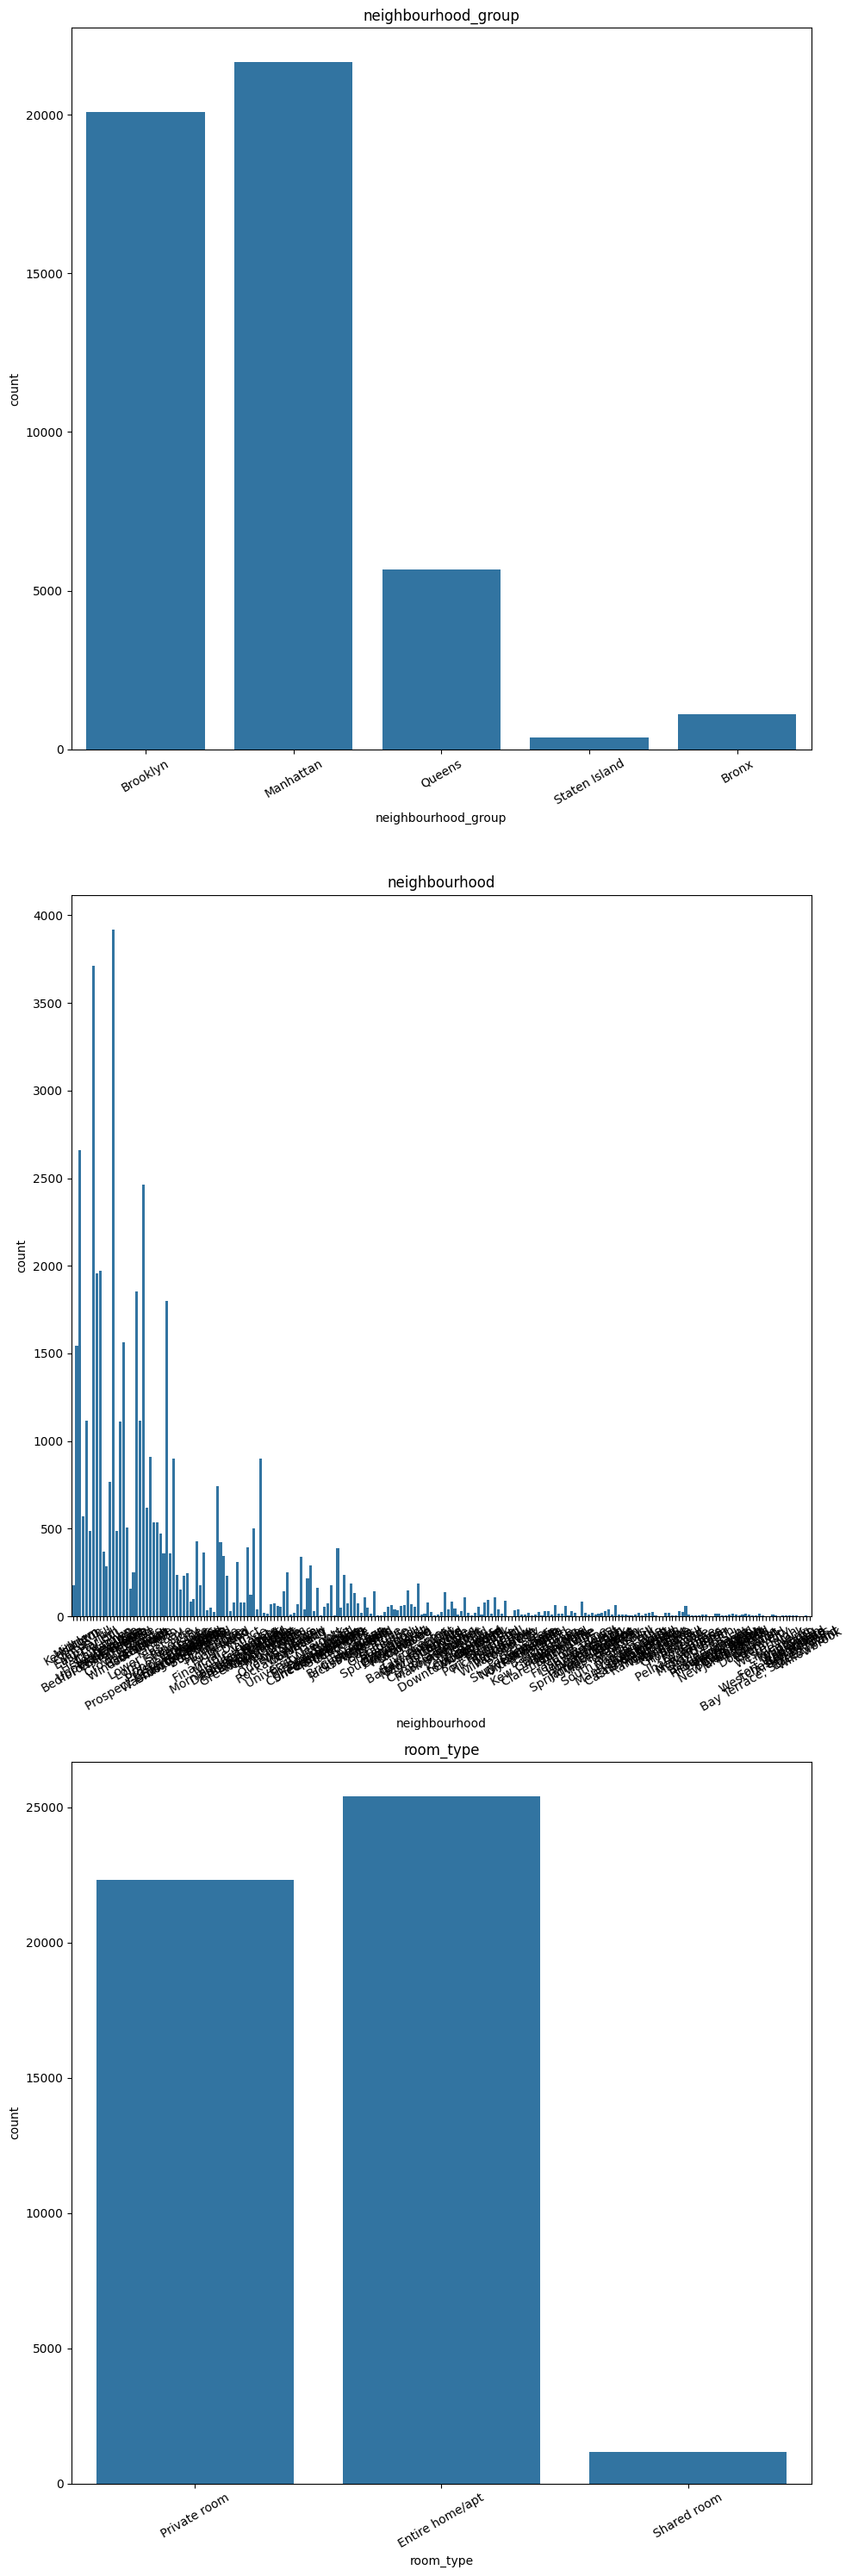

In [12]:
col_cat = ["neighbourhood_group","neighbourhood","room_type"]
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
plt.tight_layout()
plt.show()
  

En este caso vemos que en la columna "neighbourhood" existen muchos y no podemos verificar asi que vamos a comodar en caso que existan diferencias de mayusculas que es el caso mas comun aunque creemos que el data set esta bien 

In [14]:
# subniveles antes de colocar todo e minuscula 
col_cat =["neighbourhood_group","neighbourhood","room_type"]

for col in col_cat:
    print(f'Columna {col}: {data[col].nunique()} Subniveles')
    

Columna neighbourhood_group: 5 Subniveles
Columna neighbourhood: 221 Subniveles
Columna room_type: 3 Subniveles


In [16]:
# Colocando todo en minuscula 
for column in data.columns:
    if column in col_cat:
        data[column] = data[column].str.lower()

for col in col_cat:
    print(f'Columna {col}: {data[col].nunique()} Subniveles')


Columna neighbourhood_group: 5 Subniveles
Columna neighbourhood: 221 Subniveles
Columna room_type: 3 Subniveles


En este caso comprobamos que no existian problemas con variables que tuvieran errores Tipologicos en cuanto a mayusculas y minusculas 